In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

doc = open('desktop/paper/diabetes_scale.txt', 'r')
data = doc.read()
doc.close()
data = data.split('\n')

data_list = []
for raws in data:
    data_list.append(raws.split(' '))
    
data_list.pop()

for index_raw, raws in enumerate(data_list):
    for index_col , column in enumerate(raws):
        
        if raws[index_col] == '':
            data_list[index_raw].pop()
            
        elif raws[index_col][1] == ':':
            raws[index_col] = float(raws[index_col][2:])
        
        elif raws[index_col][0] == '+':
            raws[index_col] = int(1)
            
        elif raws[index_col][0] == '-':
            raws[index_col] = int(0)
        
            
data_frame = pd.DataFrame(data_list)
data_frame = data_frame.fillna(0)
data_frame.head()

,0,1,2,3,4,5,6,7,8
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


### Split Train a and Test Sets

We will shuffle our date and split X and y into train and test set in a 75-25 proportion.

In [79]:
split_train = (len(data_frame)//4)*2
split_val = (len(data_frame)//4)*3

data_np = data_frame.to_numpy()
np.random.seed(3)
np.random.shuffle(data_np)

y_train = data_np[:split_train,:1]
y_val = data_np[split_train:split_val,:1]
y_test = data_np[split_val:,:1]

X_train = data_np[:split_train,1:]
X_val = data_np[split_train:split_val,1:]
X_test = data_np[split_val:,1:]

print(len(X_train),len(X_val),len(X_test))

384 192 192


In [80]:
def accuracy_rate(predicted,actual):
    trues = 0
    if len(predicted) != len(actual):
        return f'Different Size'
    else:
        for element in range(len(predicted)):
            if predicted[element] == actual[element]:
                trues += 1       
    return float((trues/len(predicted)),)

## Neuron Implementation (McCulloch Pitts )

In [81]:
class Neuron:
  
    def __init__ (self):
        self.b = None
        self.max = None

    def model(self, x):
        return(sum(x) >= self.b)
  
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y,val_X,val_y):
        accuracy = {}
    
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_rate(Y_pred, Y)
      
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        self.max = accuracy[best_b]
        
        
    def max_accuracy(self):
        return self.max
        
    def best_b(self):
        return self.b

In [84]:
diabetes_neuron = Neuron()

diabetes_neuron.fit(X_train,y_train, X_val, y_val)

print('Best B: ',diabetes_neuron.best_b(),'\nValidation Set Accuracy: ',diabetes_neuron.max_accuracy())

y_neuron_test = diabetes_neuron.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_neuron_test, y_test))

Best B:  1 
Validation Set Accuracy:  0.390625
Test Set Accuracy:  0.3177083333333333


## Perceptron Implementation (F. Rosenblat)

In [49]:
class Perceptron:

    def __init__ (self):
        self.w = None
        self.b = None
        self.max = None
    
    def model(self, x):
        if (np.dot(self.w, x) >= self.b):
            return 1 
        
        else:
            return 0
  
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, val_X, val_Y, epochs = 10, lr = 0.1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        val_accuracy = {}
        max_accuracy = 0
        wt_matrix = []
        
        #for all epochs
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            wt_matrix.append(self.w)   
            
            #for train set 
            accuracy[i] = accuracy_rate(self.predict(X), Y)

            
            #for validation set
            val_accuracy[i] = accuracy_rate(self.predict(val_X), val_Y)
            
            if (val_accuracy[i] > max_accuracy):
                max_accuracy = val_accuracy[i]
                chkptw = self.w
                chkptb = self.b
                
                
        #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb
        
        self.max = max_accuracy
        
        #plot the accuracy values over epochs
        plt.plot(accuracy.values())
        plt.plot(val_accuracy.values())
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
    
        return np.array(wt_matrix)
    
    def max_accuracy(self):
        return self.max
    
    def best_b(self):
        return self.b

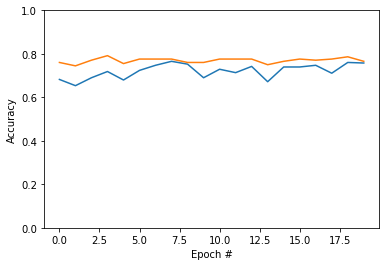

Best B:  -5.551115123125783e-17 
Validation Set Accuracy:  0.7916666666666666
Test Set Accuracy:  0.7395833333333334


In [103]:
diabetes_model = Perceptron()

diabetes_model.fit(X_train,y_train,X_val,y_val,20,0.2)

print('Best B: ', diabetes_model.best_b(),'\nValidation Set Accuracy: ',diabetes_model.max_accuracy())

y_pred_test = diabetes_model.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_pred_test, y_test))

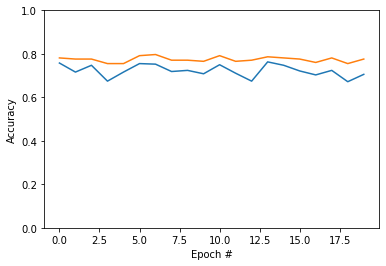

Best B:  -0.5 
Validation Set Accuracy:  0.796875
Test Set Accuracy:  0.7864583333333334


In [104]:
diabetes_model = Perceptron()

diabetes_model.fit(X_train,y_train,X_val,y_val,20,0.5)

print('Best B: ', diabetes_model.best_b(),'\nValidation Set Accuracy: ',diabetes_model.max_accuracy())

y_pred_test = diabetes_model.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_pred_test, y_test))

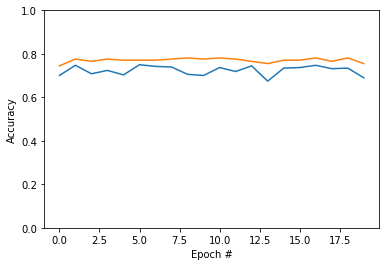

Best B:  -0.8999999999999998 
Validation Set Accuracy:  0.78125
Test Set Accuracy:  0.7447916666666666


In [108]:
diabetes_model = Perceptron()

diabetes_model.fit(X_train,y_train,X_val,y_val,20,0.9)

print('Best B: ', diabetes_model.best_b(),'\nValidation Set Accuracy: ',diabetes_model.max_accuracy())

y_pred_test = diabetes_model.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_pred_test, y_test))

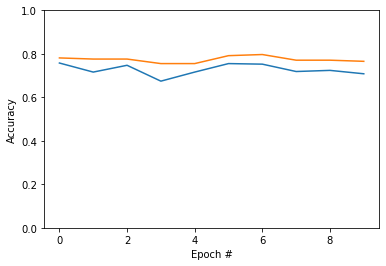

Best B:  -0.5 
Validation Set Accuracy:  0.796875
Test Set Accuracy:  0.7864583333333334


In [117]:
diabetes_model = Perceptron()

diabetes_model.fit(X_train,y_train,X_val,y_val,10,0.5)

print('Best B: ', diabetes_model.best_b(),'\nValidation Set Accuracy: ',diabetes_model.max_accuracy())

y_pred_test = diabetes_model.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_pred_test, y_test))

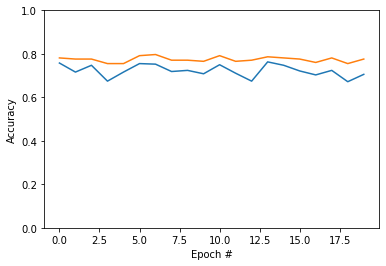

Best B:  -0.5 
Validation Set Accuracy:  0.796875
Test Set Accuracy:  0.7864583333333334


In [111]:
diabetes_model = Perceptron()

diabetes_model.fit(X_train,y_train,X_val,y_val,20,0.5)

print('Best B: ', diabetes_model.best_b(),'\nValidation Set Accuracy: ',diabetes_model.max_accuracy())

y_pred_test = diabetes_model.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_pred_test, y_test))

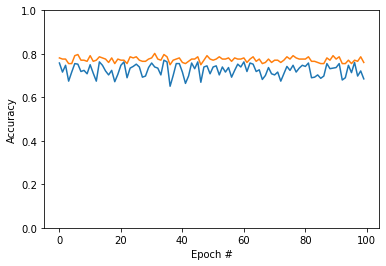

Best B:  0.0 
Validation Set Accuracy:  0.8020833333333334
Test Set Accuracy:  0.7708333333333334


In [113]:
diabetes_model = Perceptron()

diabetes_model.fit(X_train,y_train,X_val,y_val,100,0.5)

print('Best B: ', diabetes_model.best_b(),'\nValidation Set Accuracy: ',diabetes_model.max_accuracy())

y_pred_test = diabetes_model.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_pred_test, y_test))

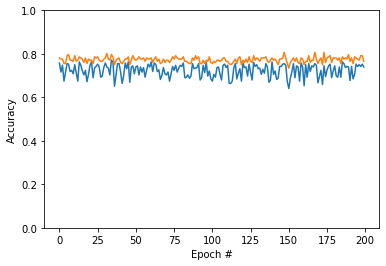

Best B:  -0.5 
Validation Set Accuracy:  0.8072916666666666
Test Set Accuracy:  0.7760416666666666


In [114]:
diabetes_model = Perceptron()

diabetes_model.fit(X_train,y_train,X_val,y_val,200,0.5)

print('Best B: ', diabetes_model.best_b(),'\nValidation Set Accuracy: ',diabetes_model.max_accuracy())

y_pred_test = diabetes_model.predict(X_test)

print('Test Set Accuracy: ',accuracy_rate(y_pred_test, y_test))